# PROBLEM STATEMENT

To build a model to accurately classify a piece of news as REAL or FAKE.

Using sklearn,  build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

<b>1. Importing Libraries

In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns

<b>2. Reading the Data

In [2]:
news = pd.read_csv('news.csv')
news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
# Finding observations of the Data
news.shape

(6335, 4)

So we have 6335 rows and 4 columns

In [4]:
news.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [5]:
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

So we have 3171 real and 3164 fake news

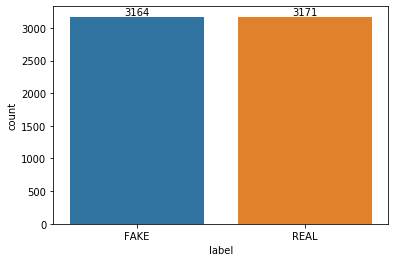

In [6]:
#Visualising that
# plt.figure(figsize=(6, 8))
splot = sns.countplot(news['label'])
for p in splot.patches:
    splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 5), textcoords = 'offset points')

In [7]:
# Checking for Null Values
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

So we have no null values here

In [8]:
#Checking unique entries in 'Text' and 'Title'
news['title'].value_counts()

OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
Fighting Ghost Fascists While Aiding Real Ones                                                        2
                                                                                                     ..
Washington's Embargo on Cuba Not Effective, Isolated US - White House                                 1
Biden previews battle against Clinton                                                                 1
NATO calls for more troops for face-off against Putin                                                 1
Why the death of GOP 'loyalty pledge' matters                   

In [9]:
news['text'].value_counts()

Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

So we have some common entries but most are unique

In [10]:
news[news['text'] == 'Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.']

,Unnamed: 0,title,text,label
14,1571,"Trump takes on Cruz, but lightly","Killing Obama administration rules, dismantlin...",REAL
90,1661,Exclusive: GOP campaigns plot revolt against RNC,"Killing Obama administration rules, dismantlin...",REAL
157,1329,How Clinton plans to stop Sanders' momentum,"Killing Obama administration rules, dismantlin...",REAL
316,1570,Rand Paul is flatlining,"Killing Obama administration rules, dismantlin...",REAL
323,1610,Jeb Bush loses TV ad edge to Marco Rubio,"Killing Obama administration rules, dismantlin...",REAL
399,1597,Trump treads on tradition in New Hampshire,"Killing Obama administration rules, dismantlin...",REAL
485,2376,Gaming Obamacare,"Killing Obama administration rules, dismantlin...",REAL
514,1590,Strong jobs number holds risks for Clinton,"Killing Obama administration rules, dismantlin...",REAL
1052,1742,Sanders’ challenge: Winning over Obama supporters,"Killing Obama administration rules, dismantlin...",REAL
1239,1406,GOP insiders: It was a rough night for Ted Cruz,"Killing Obama administration rules, dismantlin...",REAL


<b>3. Preprocessing and Standardising the data

In [11]:
# Adding a label as 0 for fake and 1 for real
news['label_num'] = news['label'].map({'FAKE':0, 'REAL':1})

#Another column with all texts including title and text
news['data'] = news['title']+' '+ news['text']
news.head()

,Unnamed: 0,title,text,label,label_num,data
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...


In [12]:
news[['title','text','data']]

,title,text,data
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matte...
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...","In Ethiopia, Obama seeks progress on peace, se..."


In [13]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

X=news['data']
Y=news['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=1705)

In [14]:
X.head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: data, dtype: object

In [15]:
X[2],Y[2]

('Kerry to go to Paris in gesture of sympathy U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his ow

<b>4. Defining Tfidf Vectorizer

In [16]:
#Inititalise Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


# tf-idf based vectors
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words = "english")
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# """
#For saving Vocabulary ? Completely optional
# Dump the file
pickle.dump(tfidf_vectorizer, open("tfidf1.pkl", "wb"))
# """

In [17]:
# """
# Testing phase
tf1 = pickle.load(open("tfidf1.pkl", 'rb'))

# Create new tfidfVectorizer with old vocabulary
tf1_new = TfidfVectorizer(analyzer='word', stop_words = "english", vocabulary = tf1.vocabulary_)
# """

In [18]:
tfidf_vectorizer.vocabulary_

{'revealing': 43716,
 'interview': 27116,
 'trump': 52911,
 'predicts': 40088,
 'massive': 32256,
 'recession': 42313,
 'intends': 26920,
 'eliminate': 17370,
 'national': 34979,
 'debt': 13860,
 'years': 57242,
 'donald': 16147,
 'said': 44899,
 'economic': 17010,
 'conditions': 11614,
 'perilous': 38483,
 'country': 12596,
 'headed': 23946,
 'terrible': 51311,
 'time': 51885,
 'right': 43966,
 'invest': 27249,
 'stock': 49302,
 'market': 32072,
 'embracing': 17507,
 'distinctly': 15825,
 'gloomy': 22245,
 'view': 55163,
 'economy': 17018,
 'counters': 12581,
 'mainstream': 31615,
 'forecasts': 20645,
 'new': 35369,
 'york': 57346,
 'billionaire': 6766,
 'dismissed': 15623,
 'concern': 11546,
 'comments': 11270,
 'exceedingly': 18665,
 'unusual': 54325,
 'unprecedented': 54125,
 'major': 31641,
 'party': 37971,
 'runner': 44664,
 'potentially': 39869,
 'affect': 2647,
 'financial': 20008,
 'markets': 32083,
 'know': 29223,
 'wall': 55681,
 'street': 49499,
 'people': 38404,
 'probably

<b>5. Defining PassiveAggressive Classifier

In [19]:
#Initialize a PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)

In [20]:
tfidf_test.shape

(1901, 58136)

In [21]:
tfidf_train.shape

(4434, 58136)

In [22]:
type(pac)

sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier

<b>6. Checking Accuracy

In [23]:
Score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(Score*100,2)}%')

Accuracy: 94.16%


In [24]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[890,  51],
       [ 60, 900]], dtype=int64)

In [25]:
# print message text for the false positives (real incorrectly classified as fake)
x_test[y_test < y_pred]

3442    Here’s How Goldman Sachs Lays People Off | Fin...
5522    Texas Cop Fired For Feeding ‘Feces’ Sandwich T...
848     California & Oregon Want To Secede From The U....
478     Gauis Publius: TPP Has Picked Up a Powerful En...
1967    How To Repair Strained Or Broken Relationships...
5653    Reflections on US Political Tragedies Reflecti...
2329    ATTENTION WESTERN WORLD: If You Care About You...
315     Trump Family Say Trump Brand Has NOT Been Dama...
3910    YIKES! Megyn Kelly Receives RUDE AWAKENING- Re...
3882    Libertarian Party VP insults Trump, practicall...
982     Baby Bonds: A Plan for Black/White Wealth Equa...
5615    Liberty or State Control? You Decide Op-Ed by ...
151     Classless Obama Refuses Photo-Op of White Hous...
5123    What Does It Take to Survive Where You Live? L...
2521    All we need to know about Trump’s demise we le...
5674    FOX: Latinos Are Already CRUSHING Trump At The...
1254    Pentagon Seeks Another $6 Billion for Overseas...
3217    Gay ma

In [26]:
# print message text for the false negatives (fake incorrectly classified as real)
x_test[y_test > y_pred]

5609    If you really want to save energy at home, for...
3614    Extreme weather to cause extreme food shortage...
2652    Mali: At least 20 dead after gunmen storm luxu...
2938    Trump’s Hitlerian disregard for the truth The ...
2277    Hot dogs, bacon and other processed meats caus...
4122    Families To Roof: 'I Forgive You, And Have Mer...
3897    Clinton Camp Tries to Deflect Suspicion as FBI...
1327    Conservatives in a meltdown: National Review’s...
1134    Adelson's Review-Journal Gives Trump First Maj...
2088    Trump Gives Victory Speech, Liberals Rediscove...
799     Kentucky governor: Electing Hillary Clinton ma...
3021    NATO and Putin: Downed Russian bomber is big t...
5638    The White House Easter Egg Roll exists because...
4138    Trump’s misleading claim that 58 percent of bl...
741     Debating the Future of American Power Abroad T...
3522    Listen to the Donald Trump voters: It has take...
1784    As His Campaign Crumbles, Trump Is Spending Hi...
533     Lawmak

In [27]:
print(x_test.tolist()[3],y_test.tolist()[3])

Young Fellas Made Of Nothing These Days, Finds Scientific Study We Use Cookies: Our policy [X] Young Fellas Made Of Nothing These Days, Finds Scientific Study November 10, 2016 - BREAKING NEWS , HEALTH Share 0 Add Comment 
DOCTORS studying the make-up of young fellas have found that they are made of nothing these days, in contrast to the men of old. 
The scientific study, carried out by a team of genetic experts at Trinity College Dublin, found that the majority of Irish males aged between 16-30 have grown a lot weaker physically and less resilient to cold temperatures over the past 60 years. Of 100 Irish males tested in physical work environments, 67% percent moaned about being tired and fatigued after just two minutes. 
“We put the study group to work on a local farm picking spuds, weeding gardens and doing general old time shit,” lead researcher Professor Conor Tracey explains, “We even made them travel to work in their bare feet. The results we got back were absolutely appalling to

<b>7. Saving the model

In [28]:
# Save to file in the current working directory
import pickle
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pac, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(tfidf_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(tfidf_test)

Test score: 94.16 %


<b>8. Trying out stuff

In [29]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

text = input("Write a bit of news: ")
print("Text is:",text)
print("Loading Model...")
pkl_filename = "model.pkl"
try:
    with open(pkl_filename, 'rb') as file:
        model = pickle.load(file)
        tf1 = pickle.load(open("tfidf1.pkl", 'rb'))
    print("Model Loaded.")
except:
    print("Error: Model not found")
    


# Create new tfidfVectorizer with old vocabulary
tf1_new = TfidfVectorizer(analyzer='word', stop_words = "english", vocabulary = tf1.vocabulary_)

X_temp = tf1_new.fit_transform([text])
X_temp.toarray()
predict = model.predict(X_temp)
print(predict)

Write a bit of news: Hillary is hillarious
Text is: Hillary is hillarious
Loading Model...
Model Loaded.
['FAKE']


In [30]:
n=2
X[n],Y[n]

('Kerry to go to Paris in gesture of sympathy U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his ow

In [33]:
X_temp = tf1_new.fit_transform([X[n]])
X_temp.toarray()
predict = model.predict(X_temp)
print(predict)

['REAL']


The END